<font color='red'> <font size="4">
1\) Reproduce Figure 9.3 (yes, Figure 9.3) using the 3D plotting library presented in this notebook. (This exercise is not focused on model comparison, but on helping you understand distributions with more than two parameters, and how prior/likelihood/posterior are related to each other) </font> </font>
<font color='blue'> <font size="4">
    It is impelemented in the script, Figure9.3.py 
    </font>

<font color='red'> 
2\) Exercise 10.1. \[Purpose: To illustrate the fact that models with more
distinctive predictions can be more easily discriminated.\] <br>
Consider the scenario
of Section 10.2.1, in which there were two coin factories, one of which was tail-biased
and the other head-biased. Suppose we flip a coin that we know is from one of the two
factories but we do not know which factory, and the prior probabilities of the factories
are 50/50. The results show z = 7 heads in N = 10 flips.
<br>
(A) If ω 1 = 0.25, ω 2 = 0.75, and κ = 6, what are the posterior probabilities of the
factories?
<br>
(B) If ω 1 = 0.25, ω 2 = 0.75, and κ = 202, what are the posterior probabilities of
the factories?
</font> 

<br>
  $$\theta \sim \text{beta}(\theta \mid \omega_m(\kappa-2)+1,
  (1-\omega_m)(\kappa-2)+1)$$
<br>

In [56]:
    import numpy as np
import scipy.special as ss

# Equation 10.6
pD = lambda z,N,a,b : np.exp(ss.betaln(z+a, N-z+b)-ss.betaln(a,b)) 

## Specific data
z=7; N=10

## Prior for tail-biased factory
ω1=0.25; κ1=6
pDm1 = pD(z, N, ω1*(κ1-2)+1, (1-ω1)*(κ1-2)+1)
# print("p(D | m=1 ) = " + str(pDm1))

## Prior for head-biased factory
ω2=0.75; κ2=6
pDm2 = pD(z, N, ω2*(κ2-2)+1, (1-ω2)*(κ2-2)+1) 
# print("p(D | m=2 ) = " + str(pDm2))

## Bayes factor
BF = pDm1/pDm2
print("p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is " + str(BF))
# print("p(D|m=2)/p(D|m=1) = " + str(1/BF))


## Prior for tail-biased factory
ω1=0.25; κ1=202
pDm1 = pD(z, N, ω1*(κ1-2)+1, (1-ω1)*(κ1-2)+1)
# print("p(D | m=1 ) = " + str(pDm1))

## Prior for head-biased factory
ω2=0.75; κ2=202
pDm2 = pD(z, N, ω2*(κ2-2)+1, (1-ω2)*(κ2-2)+1) 
# print("p(D | m=2 ) = " + str(pDm2))

## Bayes factor
BF = pDm1/pDm2
print("p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 202 is " + str(BF))
# print("p(D|m=2)/p(D|m=1) = " + str(1/BF))

p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 6 is 0.33333333333333354
p(D|m=1)/p(D|m=2) with ω1 = 0.25, ω2 = 0.75, and κ = 202 is 0.016215959918446363


<font color='green'> <font size="4">
The convention is that if the BF>3.0 for a model, say 𝑚=1, then we say that there is substantial evidence for model 𝑚=1. Conversely, there is substantial evidence for model 𝑚=2 if BF<1/3 for model 𝑚=1. </font>

<font color='red'> 
(C) Why are the posterior probabilities so different in parts A and B, even though
the modes of the factories are the same?
    </font>
    
<font color='blue'> 
In both cases, the head-biased factory (model 2) is favored because the data showed more
heads than tails. But the data are more decisive in the second part (when kappa=202) because
the factories make more consistently distinctive coins. In Part B (kappa=202), coins from the
first factory have biases always near 0.25 and coins from the second factory have biases always
near 0.75. But in Part A (kappa=6), coins from the first factory have biases that could be far
from 0.25, even head biased, and coins from the second factory have biases that could be far
from 0.75, even tail biased. 
<br>
In the scenario of Part A, data such as z=7,N=10 could have come
from either factory with reasonably high probability, but in the scenario of Part B, it’s relatively
unlikely that the data could have come from the tail-biased factory.</font>

<font color='grey'> 
3\)Exercise 10.2 (B) and (C). <br> We have shown how to produce a figure similar to Figure 10.4 in the block of code after Hierarchical MCMC Computation. Study that block of code and understand what it does. Then, use the code as a base for section (B) and (C) of Exercise 10.2.
    </font>
<br>
 
<font color='red'> 
Exercise 10.2. [Purpose: To be sure you really understand the JAGS program
for Figure 10.4.]
<br>
(A) Use the script Jags-Ydich-Xnom1subj-MbernBetaModelComp.R to reproduce
Figure 10.4, including both the prior and the posterior. Explain how you generated the
MCMC sample from the prior. Include the graphical output in your answer, which will
be slightly different than Figure 10.4 because of randomness in the MCMC chain.  
(B) Make a histogram of the θ values collapsed across both models. It should look
like the bottom-middle panel of Figure 10.3. Explain why.
    </font>

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:07<00:00, 2928.21draws/s]
The number of effective samples is smaller than 10% for some parameters.


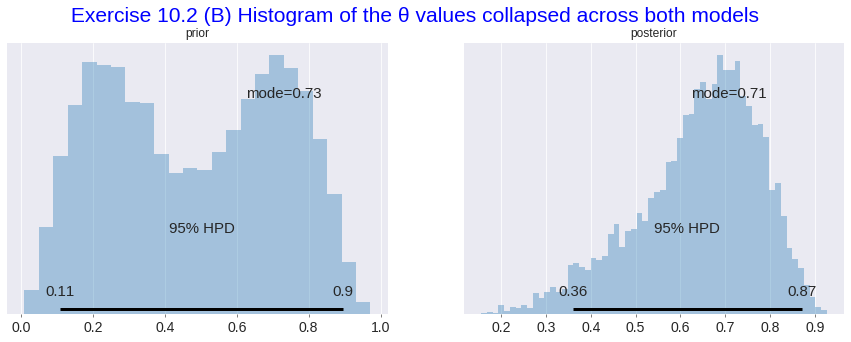

In [69]:
# Exercise 10.2 (B)
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

with pm.Model() as model:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1])  # N = 9, z = 6
    κ = 12 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000)  # TODO  
    trace = pm.sample(10000,step=pm.Metropolis())

# _, (prior_ax1, prior_ax2, prior_ax3) = plt.subplots(1,3,figsize=(10,3))
# _, (posterior_ax1, posterior_ax2, posterior_ax3) = plt.subplots(1,3,figsize=(10,3))

# Prior plots
# pm.plot_posterior(prior['m'], ax=prior_ax1, point_estimate='mean')
# pm.plot_posterior(prior['θ'][prior['m']==0], ax=prior_ax2, point_estimate='mode')
# pm.plot_posterior(prior['θ'][prior['m']==1], ax=prior_ax3, point_estimate='mode')
# prior_ax1.set_title('m (Prior)')
# prior_ax2.set_title('p(θ|m=1) (Prior)')
# prior_ax3.set_title('p(θ|m=2) (Prior)')

# Posterior plots
# pm.plot_posterior(trace['m'], ax=posterior_ax1, point_estimate='mean')
# pm.plot_posterior(trace['θ'][trace['m']==0], ax=posterior_ax2, point_estimate='mode')
# pm.plot_posterior(trace['θ'][trace['m']==1], ax=posterior_ax3, point_estimate='mode')
# posterior_ax1.set_title('m (Posterior)')
# posterior_ax2.set_title('p(θ|m=1) (Posterior)')
# posterior_ax3.set_title('p(θ|m=2) (Posterior)')


fig, (ax_prior, ax_posterior) = plt.subplots(1,2,figsize=(15,5))
plt.style.use('seaborn-darkgrid')
fig.suptitle(' Exercise 10.2 (B) Histogram of the θ values collapsed across both models', 
            color='blue', fontsize='21')
fig.subplots_adjust(hspace = 0.5) 



pm.plot_posterior(prior['θ'], ax=ax_prior, point_estimate='mode', credible_interval=.95, kind="his")
ax_prior.set_title('prior')

pm.plot_posterior(trace['θ'], ax=ax_posterior, point_estimate='mode', credible_interval=.95, kind="his")
ax_posterior.set_title('posterior')

plt.show()

<font color='red'> <font size="4">
(C) Use the script to reproduce the previous exercise. That is, change the data to
z = 7 heads in N = 10, and run the script once with κ = 6 and once with κ = 202.
Do the MCMC results match the analytical results?
</font>
<font color='blue'> <font size="4"> 
    As you can see blow,
re-running with kappa <- 202 yields the following: The MCMC chain gets stuck in one model or
the other. It is very difficult for the MCMC process to jump to the other model because the
theta value from one model doesn’t work well in the other model. We can coerce the chain to
jump a bit by (i) explicitly initializing the chains so they start in both models, (ii) setting the
prior probabilities of the models to compensate for the dominance of one model, (iii) using a
kappa value that is not as extreme as 202, and (iv) thinning the chains
                         </font>

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:06<00:00, 3179.75draws/s]
The number of effective samples is smaller than 25% for some parameters.


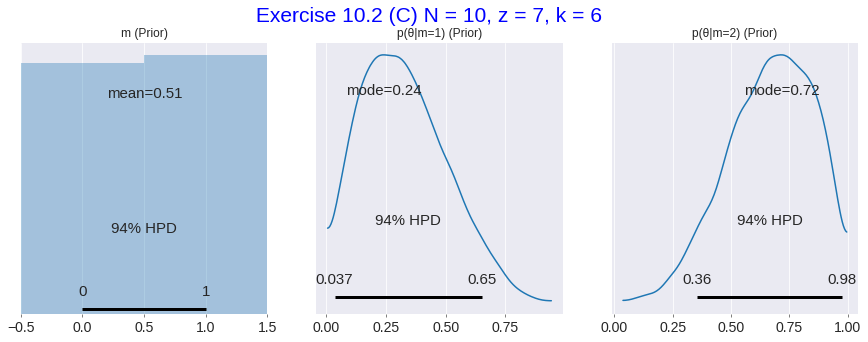

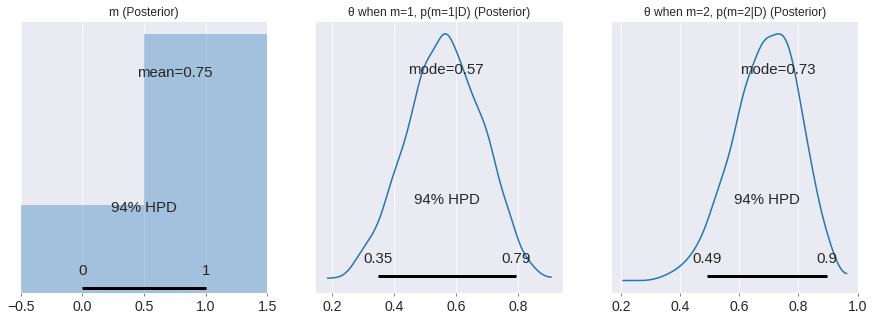

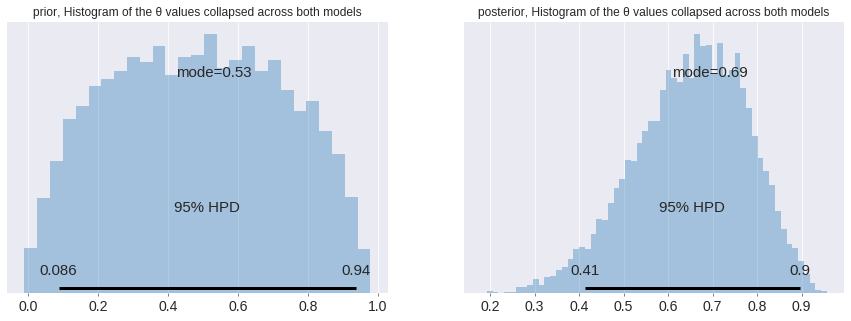

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [θ]
>Metropolis: [m]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:06<00:00, 3020.66draws/s]
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
The number of effective samples is smaller than 25% for some parameters.


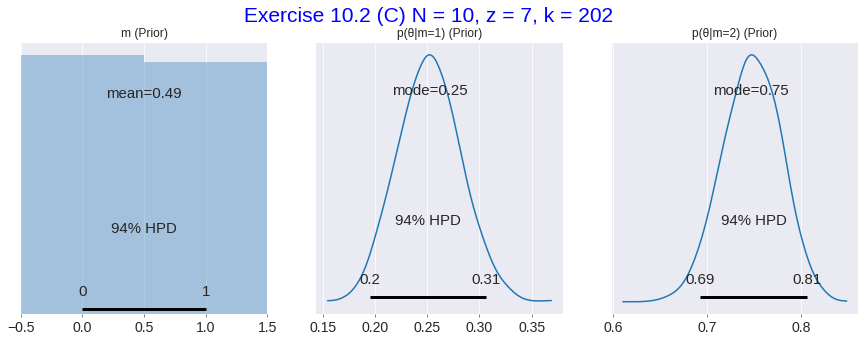

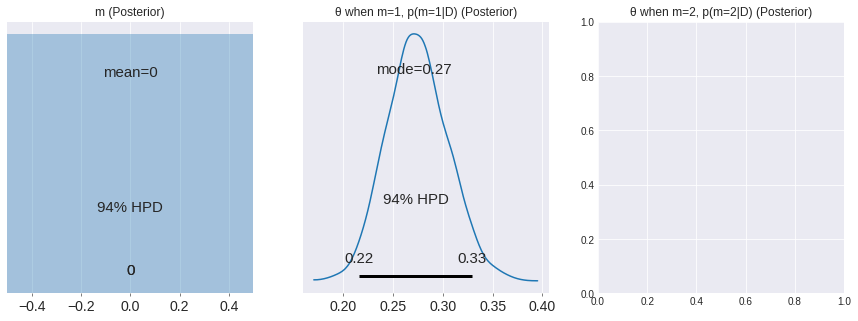

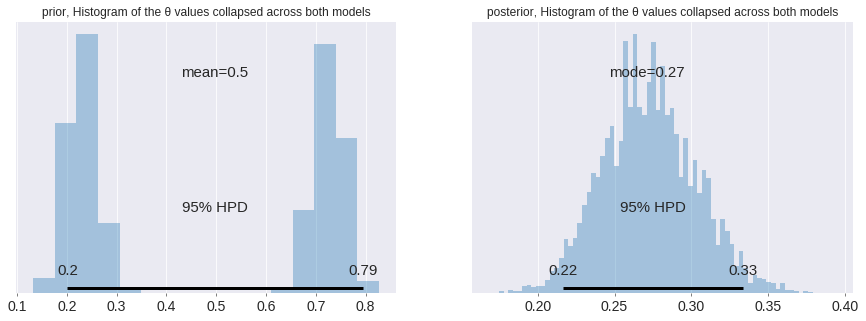

In [63]:
# Exercise 10.2 (C) z = 7 heads in N = 10, and run the script once with κ = 6
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

with pm.Model() as modelK6:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1,1])  # N = 10, z = 7
    κ = 6 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000)  # TODO  
    trace = pm.sample(10000,step=pm.Metropolis())

fig, (prior_ax1, prior_ax2, prior_ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle(' Exercise 10.2 (C) N = 10, z = 7, k = 6', color='blue', fontsize='21')
plt.style.use('seaborn-darkgrid')
fig.subplots_adjust(hspace = 0.5) 
_, (posterior_ax1, posterior_ax2, posterior_ax3) = plt.subplots(1,3,figsize=(15,5))

# Prior plots
pm.plot_posterior(prior['m'], ax=prior_ax1, point_estimate='mean')
pm.plot_posterior(prior['θ'][prior['m']==0], ax=prior_ax2, point_estimate='mode')
pm.plot_posterior(prior['θ'][prior['m']==1], ax=prior_ax3, point_estimate='mode')
prior_ax1.set_title('m (Prior)')
prior_ax2.set_title('p(θ|m=1) (Prior)')
prior_ax3.set_title('p(θ|m=2) (Prior)')

# Posterior plots
pm.plot_posterior(trace['m'], ax=posterior_ax1, point_estimate='mean')
pm.plot_posterior(trace['θ'][trace['m']==0], ax=posterior_ax2, point_estimate='mode')
pm.plot_posterior(trace['θ'][trace['m']==1], ax=posterior_ax3, point_estimate='mode')
posterior_ax1.set_title('m (Posterior)')
posterior_ax2.set_title('θ when m=1, p(m=1|D) (Posterior)')
posterior_ax3.set_title('θ when m=2, p(m=2|D) (Posterior)')


fig, (ax_prior, ax_posterior) = plt.subplots(1,2,figsize=(15,5))
plt.style.use('seaborn-darkgrid')
fig.subplots_adjust(hspace = 0.5) 



pm.plot_posterior(prior['θ'], ax=ax_prior, point_estimate='mode', credible_interval=.95, kind="his")
ax_prior.set_title('prior, Histogram of the θ values collapsed across both models')

pm.plot_posterior(trace['θ'], ax=ax_posterior, point_estimate='mode', credible_interval=.95, kind="his")
ax_posterior.set_title('posterior, Histogram of the θ values collapsed across both models')

plt.show()

###########################################3
# Exercise 10.2 (C) z = 7 heads in N = 10, and run the script once with κ = 202
with pm.Model() as modelK202:
    N = 2 # Number of factories
    data = np.array([0,0,0,1,1,1,1,1,1,1])  # N = 10, z = 7
    κ = 202 # Concentration for prior
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    ω = pm.math.switch(m, .75, .25)  # Switch to decide which ω to use
    θ = pm.Beta('θ', ω*(κ-2)+1, (1-ω)*(κ-2)+1)  # θ prior    
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihoods

    prior = pm.sample_prior_predictive(10000)  # TODO  
    trace = pm.sample(10000,step=pm.Metropolis())

fig, (prior_ax1, prior_ax2, prior_ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle(' Exercise 10.2 (C) N = 10, z = 7, k = 202', color='blue', fontsize='21')
plt.style.use('seaborn-darkgrid')
fig.subplots_adjust(hspace = 0.5)
_, (posterior_ax1, posterior_ax2, posterior_ax3) = plt.subplots(1,3,figsize=(15,5))

# Prior plots
pm.plot_posterior(prior['m'], ax=prior_ax1, point_estimate='mean')
pm.plot_posterior(prior['θ'][prior['m']==0], ax=prior_ax2, point_estimate='mode')
pm.plot_posterior(prior['θ'][prior['m']==1], ax=prior_ax3, point_estimate='mode')
prior_ax1.set_title('m (Prior)')
prior_ax2.set_title('p(θ|m=1) (Prior)')
prior_ax3.set_title('p(θ|m=2) (Prior)')

# Posterior plots
pm.plot_posterior(trace['m'], ax=posterior_ax1, point_estimate='mean')
pm.plot_posterior(trace['θ'][trace['m']==0], ax=posterior_ax2, point_estimate='mode')
# pm.plot_posterior(trace['θ'][trace['m']==1], ax=posterior_ax3, point_estimate='mode')
posterior_ax1.set_title('m (Posterior)')
posterior_ax2.set_title('θ when m=1, p(m=1|D) (Posterior)')
posterior_ax3.set_title('θ when m=2, p(m=2|D) (Posterior)')


fig, (ax_prior, ax_posterior) = plt.subplots(1,2,figsize=(15,5))
plt.style.use('seaborn-darkgrid')
# fig.suptitle(' Exercise 10.2 (C) N = 10, z = 7, k = 202')
fig.subplots_adjust(hspace = 0.5) 



pm.plot_posterior(prior['θ'], ax=ax_prior, credible_interval=.95, kind="his")
ax_prior.set_title('prior, Histogram of the θ values collapsed across both models')

pm.plot_posterior(trace['θ'], ax=ax_posterior, point_estimate='mode', credible_interval=.95, kind="his")
ax_posterior.set_title('posterior, Histogram of the θ values collapsed across both models')

plt.show()


<font color='grey'> 
4\)Exercise 10.3 (B). We have seen in the block of code after using pseudopriors to reduce autocorrelation some of the results in Figures 10.5 and 10.6. In this exercise, your task is to take this block of code as a basis to update the pseudo-priors as specified in Exercise 10.3 (B) and report the results.
    </font>
<br> 
<font color='red'> 
Exercise 10.3. [Purpose: To get some hands-on experience with pseudo-
priors.]
<br>  
(A) Use the script Jags-Ydich-Xnom1subj-MbernBetaModelCompPseudoPrior.R
to reproduce Figures 10.5 and 10.6. That is, run the script once with the pseudo-prior
set to the true prior, and then again with the pseudo-prior set to the values shown
in the text. Include the graphical output of the chain diagnostics on the model index.
Your results will differ slightly from Figures 10.5 and 10.6 because of randomness in the
MCMC chain.
<br>
(B) Change the pseudo-prior to broad distributions, with omega1[2] = omega2[1] =
0.5 and kappa1[2] = kappa2[1] = 2.1 . Run the script and report the results, including
the chain diagnostic on the model index. Discuss.
    </font>
    
<font color='blue'> 
With the broad pseudo prior, we see that the autocorrelation and ESS is intermediate between
the poor result from the true prior and the good result from the posterior-mimicking pseudo-
prior. This makes sense because the broad pseudo-prior has sub-regions that cover both the
true prior and the posterior. Because of the sub-regions that cover the posterior, the broad
pseudo-prior has better opportunity to jump between model indices than the true prior.
    </font>

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [θ2, θ1]
Sampling 2 chains, 241 divergences: 100%|██████████| 21000/21000 [00:20<00:00, 1048.32draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 239 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/home/neutron/anaconda3/envs/PP/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(


     mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
m   0.920  0.271   0.000    1.000      0.024    0.017     129.0   129.0   
θ1  0.490  0.277   0.019    0.947      0.003    0.002   10537.0  7551.0   
θ2  0.682  0.092   0.508    0.848      0.008    0.006     129.0   129.0   

    ess_bulk  ess_tail  r_hat  
m      129.0     129.0   1.01  
θ1    9689.0    8776.0   1.00  
θ2     234.0     145.0   1.01  


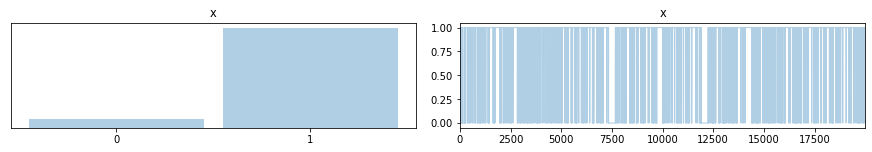

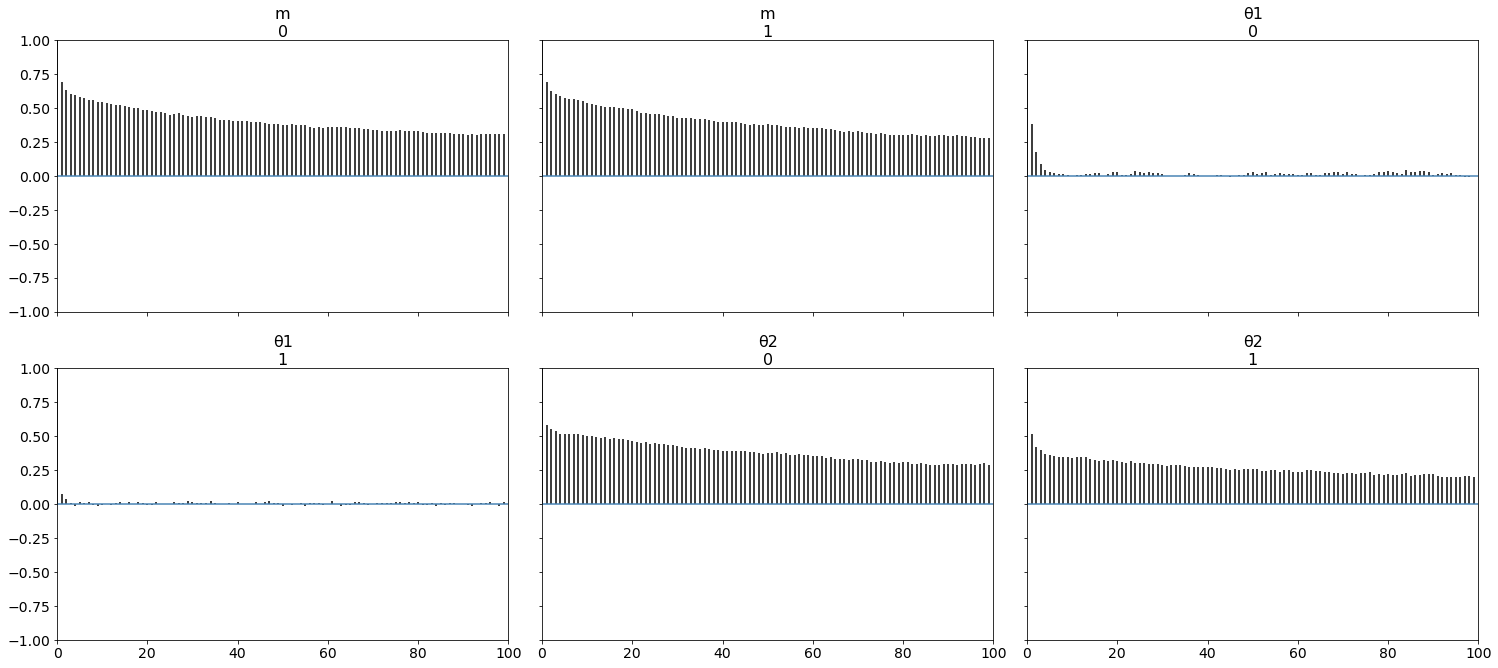

In [24]:
# Exercise 10.3 B)
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

N = 2 # Number of factories
data = np.concatenate((np.zeros(30-17),
                       np.ones(17)))  # N = 30, z = 17

ω1 = [0.10,  # true ω1 prior
      0.50]  # pseudo ω1 prior (posterior ω, obtained after running with equal true and pseudo priors) 0.40
             
    
κ1 = [20,    # true κ1 prior
      2.1]    # pseudo κ1 prior (increased by number of new experiments, 30)

ω2 = [0.90,  # true ω2 prior
      0.50]  # pseudo ω2 prior (posterior ω, obtained after running with equal true and pseudo priors) 0.7
    
κ2 = [20,   # true κ2 prior
      2.1]   # pseudo κ2 prior (increased by number of new experiments, 30)

# with pm.Model() as model_true_prior:
    
#     m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index
    
#     θ1 = pm.Beta('θ1', ω1[0]*(κ1[0]-2)+1, (1-ω1[0])*(κ1[0]-2)+1) # θ1 prior
#     θ2 = pm.Beta('θ2', ω2[0]*(κ2[0]-2)+1, (1-ω2[0])*(κ2[0]-2)+1) # θ2 prior
    
#     θ = pm.math.switch(pm.math.eq(m,0), θ1, θ2)  # Switch to decide which θ to use
#     y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihood

#     trace = pm.sample(10000)

#     fig, (posterior_ω1, posterior_ω2) = plt.subplots(1,2,figsize=(15,5))
#     fig.suptitle( """ pseudo ω1 & ω2 prior are the posterior of ω1 & ω2 respectively. It can be obtained 
#                  after running with equal true and pseudo priors""", color='blue', fontsize='21')
#     plt.style.use('seaborn-darkgrid')
#     fig.subplots_adjust(hspace = 0.5)
#     pm.plot_posterior(trace['θ1'][trace['m']==0], point_estimate='mode', ax=posterior_ω1)
#     pm.plot_posterior(trace['θ2'][trace['m']==1], point_estimate='mode', ax=posterior_ω2)
#     pm.traceplot(trace['m'])
#     pm.autocorrplot(trace)

#     print(pm.stats.summary(trace))


with pm.Model() as model_pseudoprior:
    
    m = pm.Categorical('m',p=[.5,.5])  # Prior probabilities for model index

    # We use a switch to choose true or pseudo priors based on m
    # (by default)
    chosen_ω1 = pm.math.switch(pm.math.eq(m,0),ω1[0],ω1[1])
    chosen_κ1 = pm.math.switch(pm.math.eq(m,0),κ1[0],κ1[1])
    chosen_ω2 = pm.math.switch(pm.math.eq(m,1),ω2[0],ω2[1])
    chosen_κ2 = pm.math.switch(pm.math.eq(m,1),κ2[0],κ2[1])
    
    θ1 = pm.Beta('θ1', chosen_ω1*(chosen_κ1-2)+1, (1-chosen_ω1)*(chosen_κ1-2)+1) # θ1 prior
    θ2 = pm.Beta('θ2', chosen_ω2*(chosen_κ2-2)+1, (1-chosen_ω2)*(chosen_κ2-2)+1) # θ2 prior
    
    θ = pm.math.switch(pm.math.eq(m,0), θ1, θ2)  # Switch to decide which θ to use
    y = pm.Bernoulli('y', p=θ, observed=data, shape=N) # Likelihood

    trace = pm.sample(10000)

    pm.traceplot(trace['m'])
    pm.autocorrplot(trace) 
#     Those plots are showing you the correlation of the series with itself, lagged by x time units
# If autocorrelation values are close to 0, then values between observations and lagged 
# observations are not correlated with one another. Inversely, autocorrelations with values 
# close to 1 or -1 indicate that there exists strong positive or negative correlations between the 
# lagged observations of the time series.
    print(pm.stats.summary(trace))
#     print('ess_bulk is the same as ess in the book! ω1 = [0.10,0.50], κ1 = [20, 2.1], ω2 = [0.90,0.50], κ1 = [2.1, 20] ')

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2cf240130>],
      dtype=object)

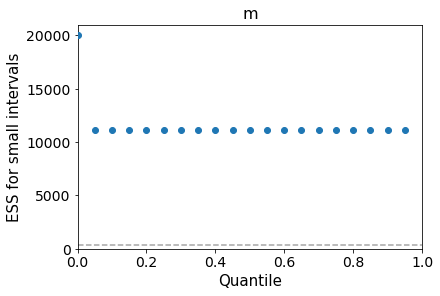

In [23]:
import arviz as az
az.plot_ess(trace, var_names=["m"], kind='local')